# <center>Toxic Comment Classification

<h5>Venkatesh Kandibanda </h5>

<h3> Overview</h3>

      With the recent growth of people on the internet, civil conversations are seeing a decline. “Whatever intelligent observations do lurk there are often drowned out by obscenities, ad-hominem attacks, and off-topic rants.” These things are forcing many online platforms which once flourished with intellectual discussions to close the comment sections. To facilitate meaningful conversations on their online platform The New York Times employed full-time moderators who moderate nearly 11,000 comments per day on the selected article(roughly 10% of Times articles). However, for small firms operating people for these tasks might be out of scope. To aid, the Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). So far they’ve built a range of publicly available models served through the Perspective API, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content)
      

# Data

Source: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview 
It consists of large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are: a. toxic 
              b. severe_toxic 
              c. obscene 
              d. threat 
              e. insult 
              f. identity_hate

# Problem Statement

 - To Build a Multi-headed model that is capable for detecting different typse of toxicity like threats,obsencity,insult and indentity hate based comments from wikipedia's talk page edits

## Objectives and  Constarints

 -  To effectively facilitate conversations, leading many communities to limit or completely shut down user comments.
 -  No Low Latency Constarint.

# Performance Metric

 - mean column wise ROC AUC Score

# Importing Packages

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
x="Class1"+"23"
type(x)

str

# Reading the data

In [3]:
train_data= pd.read_csv('train.csv/train.csv')
test_data= pd.read_csv('test.csv/test.csv')
submission = pd.read_csv('sample_submission.csv/sample_submission.csv')

In [4]:
print('shape of train data',train_data.shape)
print('shape of test data',test_data.shape)
print('columns in train data',train_data.columns)
print('columns in test data',test_data.columns)

shape of train data (159571, 8)
shape of test data (153164, 2)
columns in train data Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')
columns in test data Index(['id', 'comment_text'], dtype='object')


In [5]:
test_data.shape

(153164, 2)

In [6]:
train_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
test_data.columns

Index(['id', 'comment_text'], dtype='object')

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [12]:
test_data.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,4594229216ddcb31,""" \n\n == population density == \n\n the artic..."
freq,1,1


In [13]:
test_data.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# checking for duplicates the data

In [14]:
print('Numbers of duplicated data:', train_data.duplicated('id').sum())

Numbers of duplicated data: 0


In [15]:
print('Numbers of duplicated data:', test_data.duplicated('id').sum())

Numbers of duplicated data: 0


In [16]:
columnsums=train_data.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train_data.iloc[:,2:].sum(axis=1)
train_data_clean=(rowsums==0)
#count number of clean entries
train_data_clean.sum()

print("Total comments = ",len(train_data))
print("Total clean comments = ",train_data_clean.sum())
print("Total tags =",columnsums.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


# Observation:
     >> Here we observe that almost 89.83% of comments are clean.

In [17]:
null_check=train_data.isnull().sum()

In [18]:
print('missing any data',null_check)

missing any data id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [19]:
null_check_1=test_data.isnull().sum()

In [20]:
print('missing any data',null_check_1)

missing any data id              0
comment_text    0
dtype: int64


In [21]:
# dropping the rows with are not required that is id and comment_text
data_toxic=train_data.drop(['id','comment_text'],axis=1)
data_toxic.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

# Visualising the counts of toxic data

In [22]:
class_names= ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [23]:
counts = []
categories = list(data_toxic.columns.values)
for i in categories:
    counts.append((i, data_toxic[i].sum()))
data_stats = pd.DataFrame(counts, columns=['category', 'count'])
data_stats

,category,count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


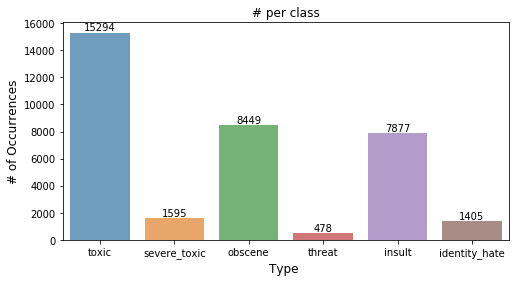

In [24]:
#https://www.kaggle.com/manishachakraborty/toxic-comment-classification
import seaborn as sns
x=train_data.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.7)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# observation:
     >> From the above plot it is clear that there are more number of toxic, obscene and insult comments compared to others.

# Preprocessing and cleaning the data

In [25]:
import operator
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
from collections import defaultdict


import sys
import re

In [26]:
def cleanHtml(sentence):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr, ' ',str(sentence))
    return cleantext

def cleanPunc(sentence):
    cleaned=re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned=cleaned.strip()
    cleaned=cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent=""
    for word in sentence.split():
        alpha_word=re.sub('[^a-z A-Z]+',' ',word)
        alpha_sent+=alpha_word
        alpha_sent+=" "
    alpha_sent=alpha_sent.strip()
    return alpha_sent

In [27]:
train_data['comment_text']=train_data['comment_text'].str.lower()
train_data['comment_text']=train_data['comment_text'].apply(cleanHtml)
train_data['comment_text']=train_data['comment_text'].apply(cleanPunc)
train_data['comment_text']=train_data['comment_text'].apply(keepAlpha)

In [28]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impro...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [29]:
stop=set(stopwords.words('english'))
stop.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','again','beside','yet','within','however'])
re_stop=re.compile(r"\b(" + "|".join(stop) + ")\\W",re.I)
def removeStopWords(sentence):
    global re_stop
    return re_stop.sub(" ",sentence)

train_data['comment_text']=train_data['comment_text'].apply(removeStopWords)
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore m...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement ...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats on,0,0,0,0,0,0


In [30]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

train_data['comment_text'] = train_data['comment_text'].apply(stemming)
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0


In [31]:
test_data.columns

Index(['id', 'comment_text'], dtype='object')

In [32]:
test_data['comment_text']=test_data['comment_text'].str.lower()
test_data['comment_text']=test_data['comment_text'].apply(cleanHtml)
test_data['comment_text']=test_data['comment_text'].apply(cleanPunc)
test_data['comment_text']=test_data['comment_text'].apply(keepAlpha)
test_data['comment_text']=test_data['comment_text'].apply(removeStopWords)
test_data['comment_text'] = test_data['comment_text'].apply(stemming)

In [33]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succes youll ever what hate s...
1,0000247867823ef7,rfc titl fine imo
2,00013b17ad220c46,sourc zaw ashton lapland
3,00017563c3f7919a,look back sourc inform updat correct form gues...
4,00017695ad8997eb,dont anonym edit articl all


In [34]:
model_test= test_data.drop(['id'],axis=1)

In [35]:
model_test.shape

(153164, 1)

In [36]:
model_test.columns

Index(['comment_text'], dtype='object')

In [37]:
model_test.head()

,comment_text
0,yo bitch ja rule succes youll ever what hate s...
1,rfc titl fine imo
2,sourc zaw ashton lapland
3,look back sourc inform updat correct form gues...
4,dont anonym edit articl all


In [38]:
train_text_total=train_data['comment_text']
test_text_total=test_data['comment_text']
all_text_total = pd.concat([train_text_total, test_text_total])

In [39]:
train_text_total.shape

(159571,)

In [40]:
test_text_total.shape

(153164,)

In [41]:
train_data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0


In [42]:
train_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(train_data, random_state=42, test_size=0.15, shuffle=True)
print(train.shape)
print(test.shape)

(135635, 8)
(23936, 8)


In [44]:
train_text=train['comment_text']
test_text=test['comment_text']
all_text = pd.concat([train_text, test_text])

In [45]:
train_text.shape

(135635,)

In [46]:
all_text.shape

(159571,)

In [47]:
test_text.shape

(23936,)

# Vectorizing the data with Tfidf vectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.pipeline import make_union
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 1),max_features=30000)
word_vectorizer.fit(train_text)
word_vectorizer.transform(test_text)

<23936x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 602286 stored elements in Compressed Sparse Row format>

In [49]:
from pickle import dump
dump(word_vectorizer,open('vectorizer_tfidf.pkl','wb'))

In [50]:
x_train=word_vectorizer.transform(train_text)
y_train=train.drop(labels=['id','comment_text'],axis=1)

x_test=word_vectorizer.transform(test_text)
y_test=test.drop(labels=['id','comment_text'],axis=1)

In [51]:
print('shape of the x_train',x_train.shape)
print('shape of the x_test',x_test.shape)

shape of the x_train (135635, 30000)
shape of the x_test (23936, 30000)


In [52]:
y_train.shape

(135635, 6)

In [53]:
y_train.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [54]:
y_test.shape

(23936, 6)

In [55]:
train_data_total=word_vectorizer.transform(train_text_total)
print("shape of train_data_total",train_data_total.shape)

shape of train_data_total (159571, 30000)


In [56]:
y_train_total=train_data.drop(labels=['id','comment_text'],axis=1)
y_train_total.shape

(159571, 6)

In [57]:
test_data_total=word_vectorizer.transform(test_text_total)
print("shape of test_data_total",test_data_total.shape)

shape of test_data_total (153164, 30000)


# Baseline models

# Modelling on Logistic regression

In [56]:
#https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
#https://medium.com/@saugata.paul1010/a-detailed-case-study-on-multi-label-classification-with-machine-learning-algorithms-and-72031742c9aa
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 
from scipy import stats

alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
params  = {"estimator__C":alpha,
           "estimator__penalty":penalty}
base_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
rsearch_cv = RandomizedSearchCV(estimator=base_estimator, param_distributions=params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
rsearch_cv.fit(x_train, y_train)

print("Best estimator: ",rsearch_cv.best_estimator_)
print("Best Cross Validation Score: ",rsearch_cv.best_score_)

Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.980914764563676


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
scores = []
results=pd.DataFrame()
submission = pd.DataFrame.from_dict({'id': test_data['id']})
current_time=
for class_name in class_names:
    train_target = y_train[class_name]
    
    classifier = OneVsRestClassifier(LogisticRegression(C=1,solver='lbfgs',penalty='l2'))
    classifier.fit(x_train, train_target)

    cv_score = np.mean(cross_val_score(
        classifier, x_train, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    
    prediction_log=classifier.predict_proba(x_test)[:, 1]
    results[class_name]=(prediction_log)
    
    submission[class_name] = classifier.predict_proba(test_data_total)[:,1]
print('Total CV score is {}'.format(np.mean(scores)))
submission.to_csv('submission_test_lr.csv', index=False)

CV score for class toxic is 0.9712958674938319
CV score for class severe_toxic is 0.9869779931014886
CV score for class obscene is 0.9869564357541316
CV score for class threat is 0.9815785065612058
CV score for class insult is 0.977632570422355
CV score for class identity_hate is 0.9786239893639861
Total CV score is 0.9805108937828332


In [58]:
results.head(4)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.161918,0.006732,0.036917,0.002251,0.041304,0.008880
1,0.007625,0.001158,0.001874,0.001115,0.003141,0.001179
2,0.112042,0.009075,0.040564,0.003200,0.081120,0.013304
3,0.002309,0.001433,0.003440,0.000741,0.002389,0.001172


In [59]:
sample_final_1=pd.read_csv('submission_test_lr.csv')
sample_final_1.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.997398,0.163815,0.991399,0.039684,0.936991,0.213891
1,0000247867823ef7,0.010363,0.003122,0.006035,0.001771,0.009255,0.003804
2,00013b17ad220c46,0.035225,0.003900,0.013490,0.001464,0.016080,0.003220
3,00017563c3f7919a,0.003172,0.002207,0.002697,0.000960,0.003536,0.000887
4,00017695ad8997eb,0.020858,0.001391,0.006694,0.001999,0.007805,0.001873


# Logistic Regression on total test data.

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 
from scipy import stats

alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
params  = {"estimator__C":alpha,
           "estimator__penalty":penalty}
base_estimator_total = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
rsearch_cv_total = RandomizedSearchCV(estimator=base_estimator_total, param_distributions=params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
rsearch_cv_total.fit(train_data_total, y_train_total)

print("Best estimator: ",rsearch_cv_total.best_estimator_)
print("Best Cross Validation Score: ",rsearch_cv_total.best_score_)

Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced'),
                    n_jobs=-1)
Best Cross Validation Score:  0.9813336960945588


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
scores = []
results=pd.DataFrame()
submission = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    file_name="LogisticRegression_"+class_name+".pkl"
    train_target = train_data[class_name]
    
    classifier_total = OneVsRestClassifier(LogisticRegression(C=1,solver='lbfgs',penalty='l2',max_iter = 1000))
    classifier_total.fit(train_data_total, train_target)

    cv_score = np.mean(cross_val_score(
        classifier_total, train_data_total, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    
    prediction_log_total=classifier_total.predict_proba(test_data_total)[:, 1]
    results[class_name]=(prediction_log_total)
    dump(classifier_total,open(file_name,'wb'))
    submission[class_name] = classifier_total.predict_proba(test_data_total)[:,1]
print('Total CV score is {}'.format(np.mean(scores)))
submission.to_csv('submission_test_lr_total.csv', index=False)

CV score for class toxic is 0.972456845954271
CV score for class severe_toxic is 0.986701387539147
CV score for class obscene is 0.9874368036418085
CV score for class threat is 0.9830126008236074
CV score for class insult is 0.97880652715562
CV score for class identity_hate is 0.9777262777616788
Total CV score is 0.9810234071460221


In [60]:
results.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.997984,0.160883,0.994528,0.038573,0.944541,0.243099
1,0.007465,0.003214,0.005036,0.001603,0.009193,0.003483
2,0.032511,0.003813,0.012430,0.001356,0.014662,0.003079
3,0.002945,0.002096,0.002652,0.000818,0.003582,0.000805
4,0.027779,0.001829,0.006820,0.001841,0.007622,0.001824


# Naive Bayes modelling on test data.

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy import stats

alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

params  = {"estimator__alpha":alpha}
base_estimator_1 = OneVsRestClassifier(MultinomialNB(alpha=params, class_prior=None, fit_prior=True))
rsearch_cv_1 = RandomizedSearchCV(estimator=base_estimator_1, param_distributions=params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
rsearch_cv_1.fit(x_train, y_train)

print("Best estimator: ",rsearch_cv_1.best_estimator_)
print("Best Cross Validation Score: ",rsearch_cv_1.best_score_)

Best estimator:  OneVsRestClassifier(estimator=MultinomialNB(alpha=0.1, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)
Best Cross Validation Score:  0.9525336414826123


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
scores = []
results=pd.DataFrame()
submission = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = y_train[class_name]
    
    classifier_nb = OneVsRestClassifier(MultinomialNB(alpha=0.1))
    classifier_nb.fit(x_train,train_target)

    cv_score = np.mean(cross_val_score(
        classifier_nb, x_train, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    prediction_nb=classifier_nb.predict_proba(x_test)[:, 1]
    results[class_name]=(prediction_nb)
    
    submission[class_name] = classifier_nb.predict_proba(test_data_total)[:,1]
    
print('Total CV score is {}'.format(np.mean(scores)))
submission.to_csv('submission_test_nb.csv', index=False)

CV score for class toxic is 0.9506013565902179
CV score for class severe_toxic is 0.9679130968762545
CV score for class obscene is 0.9587730887714053
CV score for class threat is 0.9203702487798884
CV score for class insult is 0.956933578244768
CV score for class identity_hate is 0.942268182732366
Total CV score is 0.9494765919991499


In [80]:
results.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.125010,0.001284,0.033004,2.223076e-04,0.020556,0.004363
1,0.005653,0.000031,0.000949,4.429256e-06,0.001250,0.000037
2,0.251955,0.004377,0.135066,1.171717e-03,0.149314,0.013331
3,0.000168,0.000007,0.000142,9.402275e-07,0.000104,0.000009
4,0.005533,0.000017,0.001863,1.914112e-06,0.000880,0.000051


#  Logistic Regression with SGD classifier on test data

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from scipy import stats

alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
penalty=['l1','l2']
params  = {"estimator__alpha":alpha,
           "estimator__penalty":penalty}
base_estimator_2 = OneVsRestClassifier(SGDClassifier(loss='log'))
rsearch_cv_2 = RandomizedSearchCV(estimator=base_estimator_2, param_distributions=params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
rsearch_cv_2.fit(x_train,y_train)

print("Best estimator: ",rsearch_cv_2.best_estimator_)
print("Best Cross Validation Score: ",rsearch_cv_2.best_score_)

Best estimator:  OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=None)
Best Cross Validation Score:  0.9809687189770602


In [82]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
scores = []
results=pd.DataFrame()
submission = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = y_train[class_name]
    
    classifier_lr = OneVsRestClassifier(SGDClassifier(alpha=0.00001,loss='log',penalty='l2'))
    classifier_lr.fit(x_train, train_target)

    cv_score = np.mean(cross_val_score(
        classifier_lr, x_train, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    
    prediction_lr=classifier_lr.predict_proba(x_test)[:, 1]
    results[class_name]=(prediction_lr)
    
    submission[class_name] = classifier_lr.predict_proba(test_data_total)[:,1]

print('Total CV score is {}'.format(np.mean(scores)))
submission.to_csv('submission_test_sgdlr.csv', index=False)

CV score for class toxic is 0.9715124347527709
CV score for class severe_toxic is 0.9868994174225678
CV score for class obscene is 0.9870182927243109
CV score for class threat is 0.9818748210265063
CV score for class insult is 0.9775883326753653
CV score for class identity_hate is 0.9787248486533655
Total CV score is 0.9806030245424809


In [83]:
results.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.174155,0.006648,0.042081,0.002547,0.042394,0.009187
1,0.009338,0.001346,0.002396,0.001357,0.003417,0.001472
2,0.129669,0.009606,0.045897,0.003671,0.080596,0.013923
3,0.003385,0.001587,0.004206,0.000941,0.002926,0.001518
4,0.008791,0.001916,0.005845,0.000957,0.003799,0.002431


# Nueral Network Models.

In [61]:
import numpy as np
np.random.seed(42)
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate,add,Conv1D
from keras.layers import GRU,LSTM, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing import text, sequence
from keras.callbacks import Callback,EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences

import os, re, csv, math, codecs

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['OMP_NUM_THREADS'] = '4'

In [62]:
#https://www.kaggle.com/tunguz/bi-gru-cnn-poolings-gpu-kernel-version
train = pd.read_csv('train.csv/train.csv')
test = pd.read_csv("test.csv/test.csv")
submission = pd.read_csv("sample_submission.csv/sample_submission.csv")
EMBEDDING_FILE = 'glove.840B.300d/glove.840B.300d.txt'
                

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
train["comment_text"].fillna("no comment")
test["comment_text"].fillna("no comment")
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(train, y, test_size = 0.1)
print("shape of X_train_1",X_train_1.shape)
print("shape of y_train_1",y_train_1.shape)

shape of X_train_1 (143613, 8)
shape of y_train_1 (143613, 6)


In [63]:
embed_size = 300 # how big is each word vector
max_features = 130000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 220 # max number of words in a comment to use



In [64]:
raw_text_train = X_train_1["comment_text"].str.lower()
raw_text_valid = X_valid_1["comment_text"].str.lower()
raw_text_test = test["comment_text"].str.lower()

In [65]:
tok = Tokenizer(num_words = max_features, lower = True)
tok.fit_on_texts(raw_text_train)

In [66]:
from pickle import dump
dump(tok,open('tokenizer.pkl','wb'))

In [67]:
X_train_1["comment_seq"] = tok.texts_to_sequences(raw_text_train)
X_valid_1["comment_seq"] = tok.texts_to_sequences(raw_text_valid)
test["comment_seq"] = tok.texts_to_sequences(raw_text_test)

In [68]:
X_train_1 = pad_sequences(X_train_1.comment_seq, maxlen = maxlen)
X_valid_1 = pad_sequences(X_valid_1.comment_seq, maxlen = maxlen)
test = pad_sequences(test.comment_seq, maxlen = maxlen)

In [69]:
from tqdm import tqdm_notebook as tqdm
count = 0
embeddings_index = {}
#Have downloaded pretrained embeddings. So loading it here
f = codecs.open(EMBEDDING_FILE, encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = ' '.join(values[:-300])
    coefs = np.asarray(values[-300:], dtype='float32')
    embeddings_index[word] = coefs.reshape(-1)
    coef = embeddings_index[word]
f.close()



In [70]:
print('Found %d word vectors of glove.',len(embeddings_index))
emb_mean,emb_std = coef.mean(), coef.std()
print(emb_mean,emb_std)

print('Total %s word vectors.',len(embeddings_index))

Found %d word vectors of glove. 2195895
-0.01444638 0.47249147
Total %s word vectors. 2195895


In [71]:
print('Preparing embedding matrix')
word_index = tok.word_index
print('Found %s unique tokens' % len(word_index))
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print('Null word embeddings: ',np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing embedding matrix
Found 197607 unique tokens
Null word embeddings:  52258


In [72]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))

# Bidirectional GRU Model with Glove embedding of 300 dimension

In [73]:
file_path_123 = "best_model_123.hdf5"
check_point_123 = ModelCheckpoint(file_path_123, monitor = "val_loss", verbose = 1,save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid_1, y_valid_1), interval = 1)
early_stop_123 = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

In [74]:
def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (maxlen,))
    x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(dr)(x)
    x = Bidirectional(GRU(units, return_sequences = True))(x1)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)

    y = Bidirectional(LSTM(units, return_sequences = True))(x1)
    y = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)

    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)

    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])
    x = Dense(6, activation = "sigmoid")(x)

    model_123 = Model(inputs = inp, outputs = x)
    model_123.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    model_123 = model_123.fit(X_train_1, y_train_1, batch_size = 128, epochs = 3, validation_data = (X_valid_1, y_valid_1),
                        verbose = 1, callbacks = [ra_val, check_point_123, early_stop_123])
    model_123 = load_model(file_path_123)
    return model_123
 

In [ ]:
pred_123 = 0
n_seeds = 10

for i in range(n_seeds):
    model_123 = build_model(lr = 1e-3, lr_d = 0, units = 128, dr = 0.2)
    pred_123 += model_123.predict(test, batch_size = 1024, verbose = 0)/n_seeds

In [76]:
submission[list_classes] = (pred_123)
submission.to_csv("submission_123.csv", index = False)

In [91]:
dump(model_123,open('gloveembedding.pkl','wb'))

# Model - 2

In [79]:
EMBEDDING_FILE_1 = 'glove.6B/glove.6B.50d.txt'
embed_size_1 = 50

In [80]:
count = 0
embeddings_index_1 = {}
#Have downloaded fastext pretrained embeddings. So loading it here
f = codecs.open(EMBEDDING_FILE_1, encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.array([float(val) for val in values[1:]])
    embeddings_index_1[word] = coefs.reshape(-1)
    coef = embeddings_index_1[word]
f.close()

In [81]:
print('Found %d word vectors of glove.',len(embeddings_index_1))
emb_mean,emb_std = coef.mean(), coef.std()
print(emb_mean,emb_std)

print('Total %s word vectors.',len(embeddings_index_1))

Found %d word vectors of glove. 400000
-0.08733540000000001 0.4519085941066844
Total %s word vectors. 400000


In [82]:
print('Preparing embedding matrix')
word_index = tok.word_index
print('Found %s unique tokens' % len(word_index))
nb_words_1 = min(max_features, len(word_index))
embedding_matrix_1 = np.zeros((nb_words_1, embed_size_1))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector_1 = embeddings_index_1.get(word)
    if embedding_vector_1 is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_1[i] = embedding_vector_1

print('Null word embeddings: ',np.sum(np.sum(embedding_matrix_1, axis=1) == 0))

Preparing embedding matrix
Found 197607 unique tokens
Null word embeddings:  56561


# Bidirectional GRU model with Glove Embedding of 50 dimension

In [83]:
inp_1 = Input(shape=(maxlen, ))
x = Embedding(nb_words_1, embed_size_1, weights=[embedding_matrix_1])(inp_1)
x1 = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(112, return_sequences=True))(x1)
x = Conv1D(56, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
y = Bidirectional(LSTM(112, return_sequences = True))(x1)
y = Conv1D(56, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
avg_pool2 = GlobalAveragePooling1D()(y)
max_pool2 = GlobalMaxPooling1D()(y)
conc = concatenate([avg_pool, max_pool,avg_pool2, max_pool2])
outp_1 = Dense(6, activation="sigmoid")(conc)
model_1 = Model(inputs=[inp_1], outputs=[outp_1]) 
print(model_1.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 220)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 220, 50)      6500000     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 220, 50)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 220, 224)     109536      spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

In [84]:
model_1.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001, decay = 0), metrics = ["accuracy"]) 
file_path_1 = "best_model_1.hdf5"
check_point_1 = ModelCheckpoint(file_path_1, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid_1, y_valid_1), interval = 1)
early_stop_1 = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
 

In [85]:
print('training the model')
model_1.fit(X_train_1, y_train_1, batch_size=128, epochs=3, validation_data=(X_valid_1, y_valid_1),
                 callbacks=[ra_val,check_point_1,early_stop_1], verbose=1)


training the model
Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 773s 5ms/step - loss: 0.0646 - accuracy: 0.9775 - val_loss: 0.0448 - val_accuracy: 0.9831

 ROC-AUC - epoch: 1 - score: 0.981961 


Epoch 00001: val_loss improved from inf to 0.04484, saving model to best_model_1.hdf5
Epoch 2/3
143613/143613 [==============================] - 768s 5ms/step - loss: 0.0465 - accuracy: 0.9824 - val_loss: 0.0433 - val_accuracy: 0.9835

 ROC-AUC - epoch: 2 - score: 0.986740 


Epoch 00002: val_loss improved from 0.04484 to 0.04326, saving model to best_model_1.hdf5
Epoch 3/3
143613/143613 [==============================] - 770s 5ms/step - loss: 0.0409 - accuracy: 0.9840 - val_loss: 0.0418 - val_accuracy: 0.9836

 ROC-AUC - epoch: 3 - score: 0.988801 


Epoch 00003: val_loss improved from 0.04326 to 0.04181, saving model to best_model_1.hdf5


In [86]:
model_1 = load_model(file_path_1)
y_pred_1 = model_1.predict(test, batch_size=1024,verbose=1)
submission[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred_1
submission.to_csv('submission_1.csv', index=False)

153164/153164 [==============================] - 30s 199us/step


# Model - 3

In [12]:
EMBEDDING_FILE_2 = 'fasttext-crawl-300d-2m/crawl-300d-2M.vec'
LSTM_UNITS =128

In [13]:
from tqdm import tqdm_notebook as tqdm
count = 0
embeddings_index_2 = {}
#Have downloaded fastext pretrained embeddings. So loading it here
f = codecs.open(EMBEDDING_FILE_2, encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = ' '.join(values[:-300])
    coefs = np.asarray(values[-300:], dtype='float32')
    embeddings_index_2[word] = coefs.reshape(-1)
    coef = embeddings_index_2[word]
f.close()

In [14]:
print('Found %d word vectors of glove.',len(embeddings_index_2))
emb_mean,emb_std = coef.mean(), coef.std()
print(emb_mean,emb_std)

print('Total %s word vectors.',len(embeddings_index_2))

Found %d word vectors of glove. 1999996
0.038247995 0.28484675
Total %s word vectors. 1999996


In [15]:
print('Preparing embedding matrix')
word_index = tok.word_index
print('Found %s unique tokens' % len(word_index))
nb_words_3 = min(max_features, len(word_index))
embedding_matrix_2 = np.zeros((nb_words_3, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector_2 = embeddings_index_2.get(word)
    if embedding_vector_2 is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_2[i] = embedding_vector_2

print('Null word embeddings: ',np.sum(np.sum(embedding_matrix_2, axis=1) == 0))

Preparing embedding matrix
Found 197607 unique tokens
Null word embeddings:  53811


In [16]:
embedding_matrix_2.shape

(130000, 300)

# Bidirectional GRU with fasttext embedding of 300 dimension

In [19]:
file_path_12 = "best_model_12.hdf5"
check_point_12 = ModelCheckpoint(file_path_12, monitor = "val_loss", verbose = 1,save_best_only = True, mode = "min")
ra_val = RocAucEvaluation(validation_data=(X_valid_1, y_valid_1), interval = 1)
early_stop_12 = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

In [20]:
def build_model_1(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (maxlen,))
    x = Embedding(max_features, embed_size, weights = [embedding_matrix_2], trainable = False)(inp)
    x1 = SpatialDropout1D(dr)(x)
    x = Bidirectional(GRU(units, return_sequences = True))(x1)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)

    y = Bidirectional(GRU(units, return_sequences = True))(x1)
    y = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)

    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)

    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])
    x = Dense(6, activation = "sigmoid")(x)

    model_12 = Model(inputs = inp, outputs = x)
    model_12.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history_fasttext = model_12.fit(X_train_1, y_train_1, batch_size = 128, epochs = 3, validation_data = (X_valid_1, y_valid_1),
                        verbose = 1, callbacks = [ra_val, check_point_12, early_stop_12])
    model_12 = load_model(file_path_12)
    return model_12

In [23]:
print(model_12.summary())

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 220)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 220, 300)     39000000    input_7[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_7 (SpatialDro (None, 220, 300)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 220, 256)     329472      spatial_dropout1d_7[0][0]        
____________________________________________________________________________________________

In [21]:
pred_12 = 0
n_seeds = 10

for i in range(n_seeds):
    model_12 = build_model_1(lr = 1e-3, lr_d = 0, units = 128, dr = 0.2)
    pred_12 += model_12.predict(test, batch_size = 1024, verbose = 1)/n_seeds

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 779s 5ms/step - loss: 0.0535 - accuracy: 0.9807 - val_loss: 0.0410 - val_accuracy: 0.9842

 ROC-AUC - epoch: 1 - score: 0.988180 


Epoch 00001: val_loss improved from inf to 0.04103, saving model to best_model_12.hdf5
Epoch 2/3
143613/143613 [==============================] - 803s 6ms/step - loss: 0.0420 - accuracy: 0.9838 - val_loss: 0.0391 - val_accuracy: 0.9844

 ROC-AUC - epoch: 2 - score: 0.989352 


Epoch 00002: val_loss improved from 0.04103 to 0.03911, saving model to best_model_12.hdf5
Epoch 3/3
143613/143613 [==============================] - 799s 6ms/step - loss: 0.0390 - accuracy: 0.9848 - val_loss: 0.0396 - val_accuracy: 0.9844

 ROC-AUC - epoch: 3 - score: 0.989320 


Epoch 00003: val_loss did not improve from 0.03911
153164/153164 [==============================] - 51s 334us/step
Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [=======

143613/143613 [==============================] - 784s 5ms/step - loss: 0.0393 - accuracy: 0.9847 - val_loss: 0.0391 - val_accuracy: 0.9846

 ROC-AUC - epoch: 3 - score: 0.989843 


Epoch 00003: val_loss did not improve from 0.03895
153164/153164 [==============================] - 47s 306us/step


In [22]:
submission[list_classes] = (pred_12)
submission.to_csv("submission_12.csv", index = False)

In [24]:
dump(model_12,open('fasttextembedding.pkl','wb'))

# Ensemble model

In [27]:
bl_log = 'submission_test_lr_total.csv'
dl_glove = 'submission_123.csv'
dl_glove_50 = 'submission_1.csv'
dl_fasttext = 'submission_12.csv'
bl_sgdlog = 'submission_test_sgdlr.csv'

In [28]:
p_logr = pd.read_csv(bl_log)
p_lstmgruglove = pd.read_csv(dl_glove)
p_lstmgruglove50 = pd.read_csv(dl_glove_50)
p_grufasttext= pd.read_csv(dl_fasttext)
p_sgdlog = pd.read_csv(bl_sgdlog)

### ensemble model of glove and fastext embedding

In [29]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
p_result = p_lstmgruglove.copy()
p_result[class_names] = (0.33*p_grufasttext[class_names] + 0.67*p_lstmgruglove[class_names]) 

In [30]:
p_result.to_csv('submission_ensemble.csv', index=False)

### ensemble model of logistic regression,glove and fasttext embedding 

In [31]:
p_result_1 = p_grufasttext.copy()
p_result_1[class_names] = (0.3*p_logr[class_names] +0.3* p_lstmgruglove[class_names] + 0.4*p_grufasttext[class_names]) 

In [32]:
p_result_1.to_csv('submission_ensemble_1.csv', index=False)

### ensemble model of glove 50dim,glove 300dim and fasttext embedding 

In [33]:
p_result_2 = p_grufasttext.copy()
p_result_2[class_names] = (0.4*p_lstmgruglove50[class_names] +0.3* p_lstmgruglove[class_names] + 0.3*p_grufasttext[class_names]) 

In [34]:
p_result_2.to_csv('submission_ensemble_2.csv', index=False)

In [29]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model","kaggle private score","kaggle public score"]
x.add_row(["logistic regression for test data",0.97712,0.97644])
x.add_row(["logistic regression for total test data",0.97762,0.97691])
x.add_row(["naive bayes for test data",0.94910,0.94918])
x.add_row(["logistic regression with SGD classifier for test data",0.97684,0.97622])


x1=PrettyTable()
x1.field_names=["Model","kaggle private score","kaggle public score"]
x1.add_row(["Bidirectional GRU with glove embedding 300d",0.98345,0.98407])
x1.add_row(["Bidirectional GRU with glove embedding 50d",0.98338,0.98453])
x1.add_row(["Bidirectional GRU with fasttext embedding 300d",0.98341,0.98436])

x2=PrettyTable()
x2.field_names=["Model","kaggle private score","kaggle public score"]
x2.add_row(["ensemble model of glove and fasttext embedding",0.98407,0.98462])
x2.add_row(["ensemble model of logistic regression,glove and fasttext embedding",0.98480,0.98508])
x2.add_row(["ensemble model of glove 50dim,glove 300dim and fasttext embedding",0.98428,0.98497])

print("************************************************** Baseline Models (ML) **************************************************\n")
print(x.get_string(start=0,end=9))
print("************************************************** Nueral network Models (DL) **************************************************\n")
print(x1.get_string(start=0,end=9))
print("************************************************** Ensemble Models (DL) **************************************************\n")
print(x2.get_string(start=0,end=9))

************************************************** Baseline Models (ML) **************************************************

+-------------------------------------------------------+----------------------+---------------------+
|                         Model                         | kaggle private score | kaggle public score |
+-------------------------------------------------------+----------------------+---------------------+
|           logistic regression for test data           |       0.97712        |       0.97644       |
|        logistic regression for total test data        |       0.97762        |       0.97691       |
|               naive bayes for test data               |        0.9491        |       0.94918       |
| logistic regression with SGD classifier for test data |       0.97684        |       0.97622       |
+-------------------------------------------------------+----------------------+---------------------+
************************************************** N